#Continue model optimization

In [44]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
import sklearn as skl
import sklearn.metrics
import sklearn.learning_curve
import sklearn.ensemble
import sklearn.dummy
import sklearn.grid_search
import sklearn.feature_extraction
import sklearn.feature_extraction.text
import sklearn.calibration
import numpy as np

import sys
sys.path = sys.path + ['..']
import get_airbnb_data
import db
import learning
import imp
imp.reload(learning)
from learning import *

In [2]:
engine = db.create_root_engine()
rawtable = pd.io.sql.read_sql_table('listings', engine, index_col='id')
Xtr, Xte, ytr, yte = get_training_test_set(rawtable, make_features=make_features4, 
                                               categorize_rating=categorize_rating4)

In [3]:
scaler = skl.preprocessing.StandardScaler()
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, criterion='gini', 
                                              max_features=497, max_depth=None, # Can experiment with this to regularize
                                              n_jobs=4, class_weight='auto') # try 'subsample' too?
clf5 = skl.pipeline.Pipeline([
        ('scaler', scaler), ('clf', clf)])
param_grid={'clf__n_estimators': [100, 1000]}
gridclf5 = skl.grid_search.GridSearchCV(clf5, param_grid=param_grid, scoring=class_weighted_accuracy_score, 
                                            n_jobs=1, cv=3, verbose=1)
gridclf5.fit(Xtr, ytr)

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:  2.0min
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 66.2min finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features=497, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'clf__n_estimators': [100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=<function class_weighted_accuracy_score at 0x7f190e798d90>,
       verbose=1)

In [4]:
gridclf5.grid_scores_

[mean: 0.39881, std: 0.00334, params: {'clf__n_estimators': 100},
 mean: 0.39868, std: 0.00145, params: {'clf__n_estimators': 1000}]

#Are bag of words features really useful? No

In [7]:
engine = db.create_root_engine()
rawtable = pd.io.sql.read_sql_table('listings', engine, index_col='id')
Xtr2, Xte2, ytr2, yte2 = get_training_test_set(rawtable, make_features=make_features5, 
                                               categorize_rating=categorize_rating4)

In [8]:
Xtr2.head()

,amenity0,amenity1,amenity2,amenity3,amenity4,amenity5,amenity6,amenity7,amenity8,amenity9,...,features2_categorical13,features2_categorical14,features2_categorical15,features2_categorical16,features2_categorical17,features2_categorical18,nDescriptionMisspellings,homeValueIndex,medianListPricePerSqFt,medianSingleFamilyHomeValue
id,,,,,,,,,,,,,,,,,,,,,
air1270664,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,4,498900,500,0
air3548511,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
air3962472,1,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,2,456300,329,0
air3867203,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,9,0,0,0
air955488,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,9,144800,99,148500


In [9]:
scaler = skl.preprocessing.StandardScaler()
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, criterion='gini', 
                                              max_features='auto', max_depth=None,
                                              n_jobs=4, class_weight='auto')
clf5 = skl.pipeline.Pipeline([
        ('scaler', scaler), ('clf', clf)])
param_grid={'clf__max_features': [10, 50, 97]}
gridclf5 = skl.grid_search.GridSearchCV(clf5, param_grid=param_grid, scoring=class_weighted_accuracy_score, 
                                            n_jobs=1, cv=3, verbose=1)
gridclf5.fit(Xtr2, ytr2)

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.7min finished


Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'clf__max_features': [10, 50, 97]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=<function class_weighted_accuracy_score at 0x7f19085d6158>,
       verbose=1)

In [10]:
gridclf5.grid_scores_

[mean: 0.39528, std: 0.00149, params: {'clf__max_features': 10},
 mean: 0.39770, std: 0.00246, params: {'clf__max_features': 50},
 mean: 0.39865, std: 0.00048, params: {'clf__max_features': 97}]

In [11]:
scaler = skl.preprocessing.StandardScaler()
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, criterion='gini', 
                                              max_features='auto', max_depth=None,
                                              n_jobs=4, class_weight='auto')
clf5 = skl.pipeline.Pipeline([
        ('scaler', scaler), ('clf', clf)])
param_grid={'clf__max_features': [70, 90]}
gridclf5 = skl.grid_search.GridSearchCV(clf5, param_grid=param_grid, scoring=class_weighted_accuracy_score, 
                                            n_jobs=1, cv=3, verbose=1)
gridclf5.fit(Xtr2, ytr2)

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   14.5s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.7min finished


Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'clf__max_features': [70, 90]}, pre_dispatch='2*n_jobs',
       refit=True, score_func=None,
       scoring=<function class_weighted_accuracy_score at 0x7f19085d6158>,
       verbose=1)

In [12]:
gridclf5.grid_scores_

[mean: 0.39948, std: 0.00181, params: {'clf__max_features': 70},
 mean: 0.39912, std: 0.00172, params: {'clf__max_features': 90}]

In [13]:
engine = db.create_root_engine()
rawtable = pd.io.sql.read_sql_table('listings', engine, index_col='id')
Xtr3, Xte3, ytr3, yte3 = get_training_test_set(rawtable, make_features=make_features5, 
                                               categorize_rating=categorize_rating5)

In [14]:
scaler = skl.preprocessing.StandardScaler()
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, criterion='gini', 
                                              max_features='auto', max_depth=None,
                                              n_jobs=4, class_weight='auto')
clf5 = skl.pipeline.Pipeline([
        ('scaler', scaler), ('clf', clf)])
param_grid={'clf__max_features': [10, 30, 50, 70, 90, 97]}
gridclf5 = skl.grid_search.GridSearchCV(clf5, param_grid=param_grid, scoring=class_weighted_accuracy_score, 
                                            n_jobs=1, cv=3, verbose=1)
gridclf5.fit(Xtr3, ytr3)

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    3.1s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  3.5min finished


Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'clf__max_features': [10, 30, 50, 70, 90, 97]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=<function class_weighted_accuracy_score at 0x7f19085d6158>,
       verbose=1)

In [15]:
gridclf5.grid_scores_

[mean: 0.61364, std: 0.00094, params: {'clf__max_features': 10},
 mean: 0.61030, std: 0.00135, params: {'clf__max_features': 30},
 mean: 0.61240, std: 0.00080, params: {'clf__max_features': 50},
 mean: 0.61263, std: 0.00293, params: {'clf__max_features': 70},
 mean: 0.61164, std: 0.00243, params: {'clf__max_features': 90},
 mean: 0.61119, std: 0.00083, params: {'clf__max_features': 97}]

In [17]:
gridclf5.best_estimator_

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [16]:
class_weighted_accuracy_score(gridclf5, Xte3, yte3)

0.61295799054956412

#Validation of estimator

In [19]:
clf = get_random_forest_clf2()

In [20]:
clf.fit(Xtr3, ytr3)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [33]:
class_weighted_accuracy_score(clf, Xte3, yte3)

0.6128446266501405

In [39]:
import pickle

In [40]:
pickle.dump(clf, open('pipe2.pkl', 'wb'))

In [24]:
clf_dummy = get_dummy_clf()

<module 'matplotlib.pyplot' from '/home/ibuder/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py'>

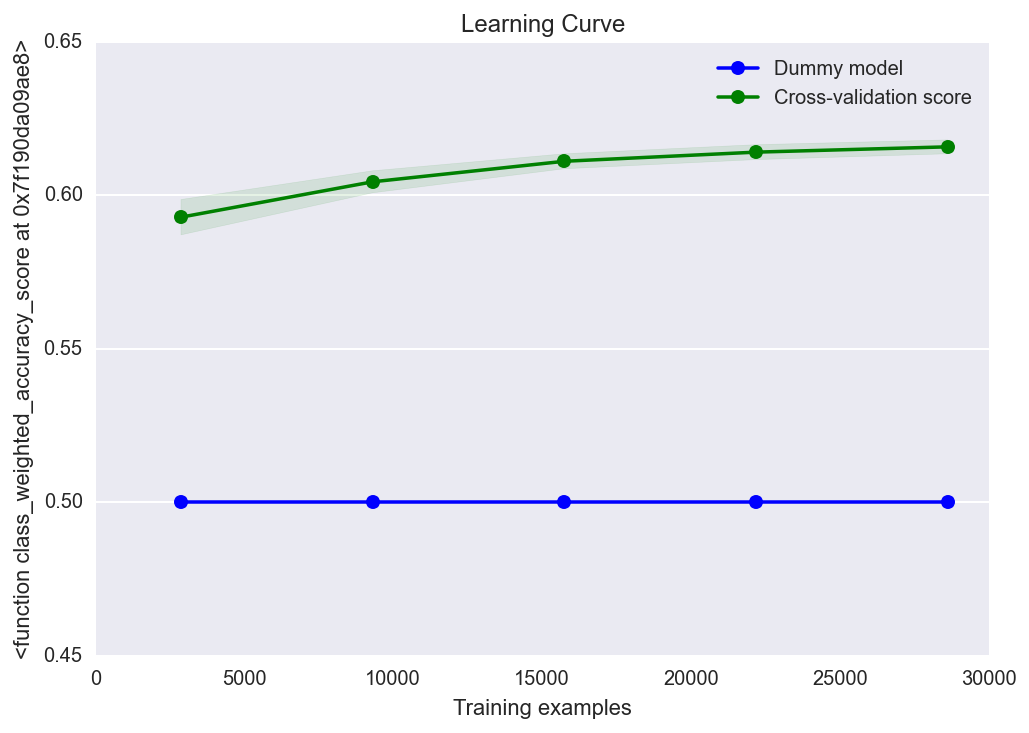

In [27]:
plot_learning_curve(clf, "Learning Curve", Xtr3, ytr3, dummy=clf_dummy, 
                    scoring=class_weighted_accuracy_score, ylim=[0.45, 0.65], n_jobs=1, plot_train=False)

##Confusion matrix

In [32]:
sklearn.metrics.confusion_matrix(yte3, clf.predict(Xte3), labels=clf.classes_).T

array([[6443, 3665],
       [1553, 2653]])

Consider weighting the classes differently to trade off precision and recall

In [29]:
clf.classes_

array(['4.75+', '4.75-'], dtype=object)

In [31]:
6443+1553

7996

In [30]:
yte3.value_counts()

4.75+    7996
4.75-    6318
dtype: int64

([<matplotlib.axis.XTick at 0x7f18f868d3c8>,
 <a list of 10 Text xticklabel objects>)

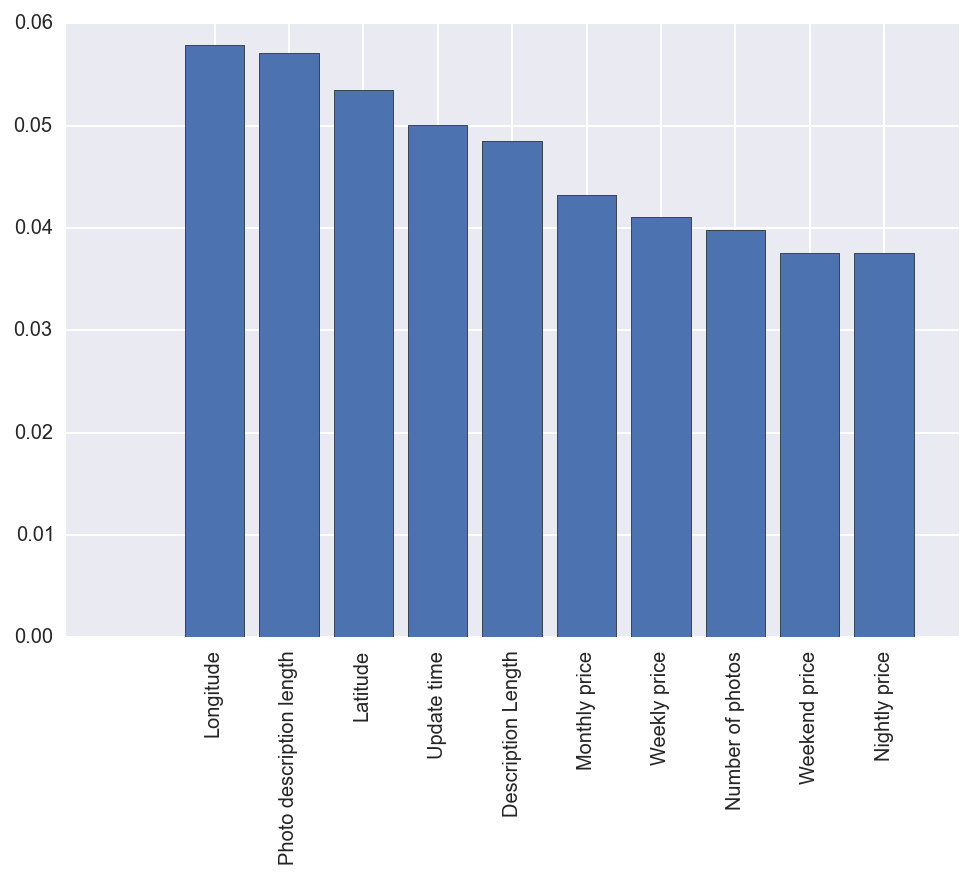

In [38]:
importance = clf.named_steps['clf'].feature_importances_
ind = importance.argsort()[::-1]  # reverse order
n_features_plot = 10
names = ['Longitude', 'Photo description length', 'Latitude', 'Update time', 
         'Description Length', 'Monthly price', 'Weekly price', 'Number of photos',
        'Weekend price', 'Nightly price']
plt.bar(range(n_features_plot), importance[ind][:n_features_plot], align='center')
plt.xticks(range(n_features_plot), names, rotation=90 )

(array([ 2878.,  3053.,  2789.,  2278.,  1568.,   956.,   538.,   146.,
           71.,    37.]),
 array([ 0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
         0.95,  1.  ]),
 <a list of 10 Patch objects>)

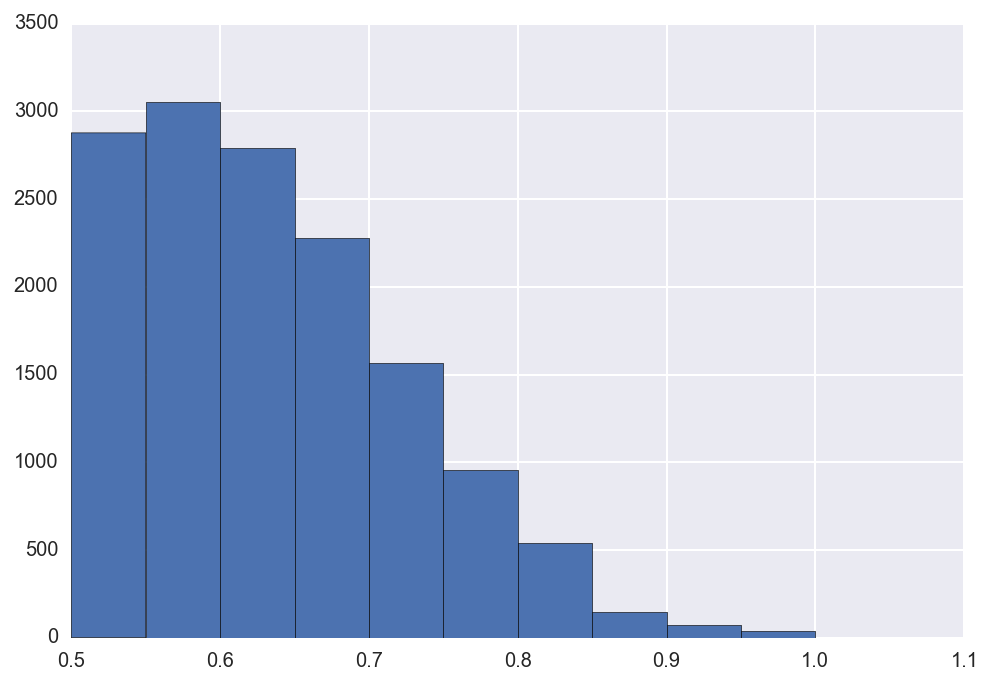

In [43]:
plt.hist(np.max(clf.predict_proba(Xte3), axis=1))

In [45]:
clf

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [46]:
calibrated_clf = skl.calibration.CalibratedClassifierCV(clf, method='isotonic')
calibrated_clf.fit(Xtr3, ytr3)

CalibratedClassifierCV(base_estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
            cv=3, method='isotonic')

(array([ 3034.,  3001.,  2742.,  2382.,  1762.,  1101.,   195.,    71.,
           18.,     8.]),
 array([ 0.50000227,  0.55000205,  0.60000182,  0.65000159,  0.70000136,
         0.75000114,  0.80000091,  0.85000068,  0.90000045,  0.95000023,  1.        ]),
 <a list of 10 Patch objects>)

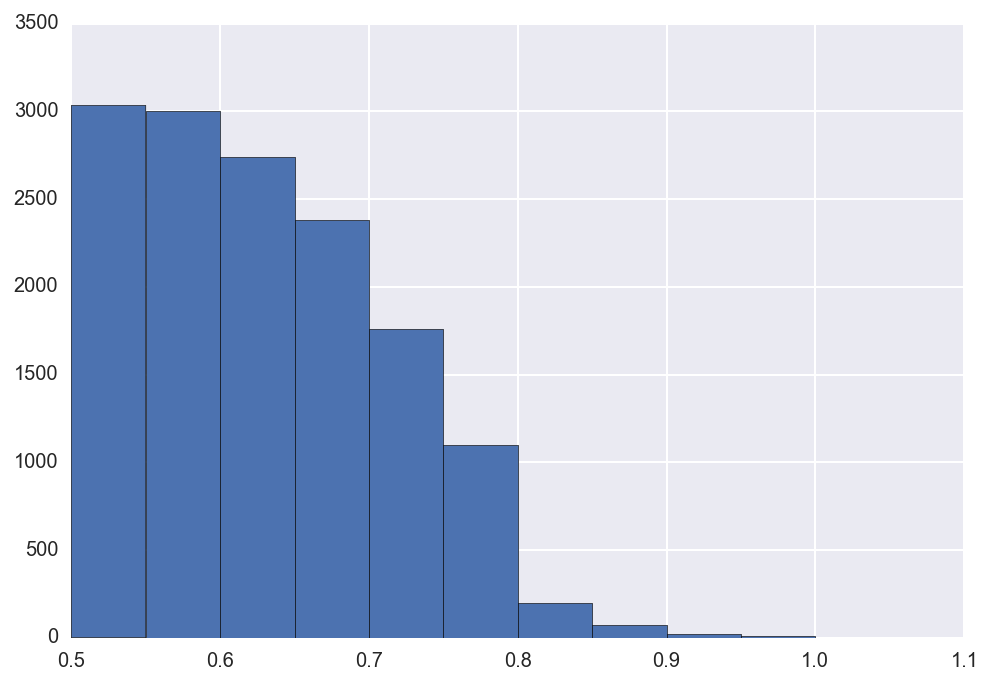

In [47]:
plt.hist(np.max(calibrated_clf.predict_proba(Xte3), axis=1))

In [55]:
five_ind = calibrated_clf.predict(Xte3) == '4.75+'
Xte3.iloc[five_ind]

,amenity0,amenity1,amenity2,amenity3,amenity4,amenity5,amenity6,amenity7,amenity8,amenity9,...,features2_categorical13,features2_categorical14,features2_categorical15,features2_categorical16,features2_categorical17,features2_categorical18,nDescriptionMisspellings,homeValueIndex,medianListPricePerSqFt,medianSingleFamilyHomeValue
id,,,,,,,,,,,,,,,,,,,,,
air3950114,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,8,0,0,706400
air2017218,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,5,1036600,740,1092300
air921304,1,1,0,0,1,0,0,0,1,1,...,0,1,0,0,1,0,13,471200,234,470300
air3793376,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,12,301200,274,1036400
air4343907,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,132500,105,135000
air78377,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,11,1341000,772,1498400
air4341475,1,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,4,377800,203,472400
air1381658,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,7,471000,301,481500
air92481,1,0,0,0,1,0,0,0,1,1,...,0,1,0,1,0,0,9,846800,564,866100


In [56]:
five_ind = calibrated_clf.predict(Xte3) == '4.75+'
five_ex = Xte3.iloc[five_ind]
np.sum(np.max(calibrated_clf.predict_proba(five_ex), axis=1) > 0.75)/len(five_ex)

0.086663409868099658

In [57]:
np.sum(np.max(calibrated_clf.predict_proba(Xte3), axis=1) > 0.75)/len(Xte3)

0.097317311722788874

In [48]:
class_weighted_accuracy_score(calibrated_clf, Xte3, yte3)

0.61908605458158017

In [58]:
pickle.dump(calibrated_clf, open('pipe2.pkl', 'wb'))

In [68]:
Xte3.index[np.logical_and(calibrated_clf.predict(Xte3) == '4.75-', np.max(calibrated_clf.predict_proba(Xte3), axis=1) > 0.75)]

Index(['air4356217', 'air4388725', 'air22450', 'air985495', 'air3808715',
       'air3221184', 'air150506', 'air1013978', 'air622197', 'air64334', 
       ...
       'air38780', 'air63375', 'air4303192', 'air4262075', 'air929891',
       'air2478448', 'air3835681', 'air3984956', 'air204812', 'air3319109'],
      dtype='object', name='id', length=506)

In [63]:
Xte3.index

Index(['air4356217', 'air3950114', 'air2474284', 'air2017218', 'air2015005',
       'air921304', 'air2978949', 'air3793376', 'air4343907', 'air463755', 
       ...
       'air2404159', 'air3344481', 'air3319109', 'air2176017', 'air589516',
       'air1565409', 'air1034608', 'air788146', 'air546383', 'air1138037'],
      dtype='object', name='id', length=14314)